<h1>Usando Árvores de Decisão para Classificar Cicatrizes de Queimada</h1>

<i>Objetivo:</i> Passo a passo para utilizar árvores de decisão e seus parâmetros 
    para classificar cicatrizes de queimada na área 223_067. 

Versão: 01/April/2018 - by Olga Bittencourt

In [1]:
# encoding: utf-8
import sys

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )

# use Seaborn styles
sns.set

<function seaborn.rcmod.set>

<h1> Leitura do conjunto de dados </h1>

In [2]:
# Arquivo de dados, formato csv
filename = ("./conjunto_dados_223_067.csv")

# Leitura do arquivo e armazenamento em um dataframe(estrutura de dados pandas como uma tabela de colunas e linhas) 
full = pd.read_csv(filename)

In [3]:
#Visão geral do conjunto de dados de entrada: 
print ("O dataframe é formado por {0} linhas e {1} colunas.".format(full.shape[0],full.shape[1]))

print "\nAmostra de 5 linhas:"
print full.head(5)

O dataframe é formado por 45893 linhas e 19 colunas.

Amostra de 5 linhas:
         id                 data_pas     area_ha      ndvi      nbrl  \
0  37512716  2017/09/24 00:00:00.000  101.678710  0.202264 -0.059606   
1  37513351  2017/09/24 00:00:00.000  144.413795  0.215696 -0.068060   
2  34997470  2017/07/22 00:00:00.000  214.029893  0.282998  0.092568   
3  34997463  2017/07/22 00:00:00.000  542.847434  0.081558 -0.040187   
4  37512702  2017/09/24 00:00:00.000  136.201953  0.287831  0.073138   

   dif_ndvi  dif_dnbrl  medianb2  medianb3  medianb4  medianb5  medianb6  \
0  0.144009   0.159632  0.135514  0.129001  0.145994  0.223395  0.327896   
1  0.207591   0.358945  0.118622  0.096372  0.096033  0.157605  0.221846   
2  0.370918   0.440223  0.116056  0.113866  0.135228  0.270077  0.324752   
3  0.377939   0.377577  0.089205  0.060692  0.049402  0.058082  0.070818   
4  0.164437   0.295616  0.124558  0.123269  0.145655  0.265826  0.344493   

   medianb7  auditoria     mirbi   

In [4]:
#Existe uma opção para setar no pandas para que ele mostre todas as colunas que fazem parte do dataframe
pd.set_option('display.max_columns', None)  

print "\nAmostra de 5 linhas:"
print full.head(5)


Amostra de 5 linhas:
         id                 data_pas     area_ha      ndvi      nbrl  \
0  37512716  2017/09/24 00:00:00.000  101.678710  0.202264 -0.059606   
1  37513351  2017/09/24 00:00:00.000  144.413795  0.215696 -0.068060   
2  34997470  2017/07/22 00:00:00.000  214.029893  0.282998  0.092568   
3  34997463  2017/07/22 00:00:00.000  542.847434  0.081558 -0.040187   
4  37512702  2017/09/24 00:00:00.000  136.201953  0.287831  0.073138   

   dif_ndvi  dif_dnbrl  medianb2  medianb3  medianb4  medianb5  medianb6  \
0  0.144009   0.159632  0.135514  0.129001  0.145994  0.223395  0.327896   
1  0.207591   0.358945  0.118622  0.096372  0.096033  0.157605  0.221846   
2  0.370918   0.440223  0.116056  0.113866  0.135228  0.270077  0.324752   
3  0.377939   0.377577  0.089205  0.060692  0.049402  0.058082  0.070818   
4  0.164437   0.295616  0.124558  0.123269  0.145655  0.265826  0.344493   

   medianb7  auditoria     mirbi      ndwi  focos  adjacencias       bai  
0  0.251095  

In [5]:
print "Resumo estatístico do conjunto:"
print full.describe()

Resumo estatístico do conjunto:
                 id       area_ha          ndvi          nbrl      dif_ndvi  \
count  4.589300e+04  45893.000000  45893.000000  45893.000000  45893.000000   
mean   3.544517e+07     23.288038      0.302389      0.153387      0.231069   
std    1.112059e+06    477.418825      0.098510      0.108707      0.127509   
min    3.452513e+07      0.541218     -0.539187     -0.825886     -0.052669   
25%    3.486706e+07      0.902423      0.235625      0.083591      0.128281   
50%    3.487853e+07      1.804023      0.311933      0.169285      0.200500   
75%    3.513052e+07      5.317182      0.374993      0.235166      0.316043   
max    3.752756e+07  49637.571226      0.580081      0.451487      0.765537   

          dif_dnbrl      medianb2      medianb3      medianb4      medianb5  \
count  45893.000000  45893.000000  45893.000000  45893.000000  45893.000000   
mean       0.283604      0.155129      0.146775      0.151701      0.273087   
std        0.098497

<h1> Pré-processamento </h1>

In [6]:
# Pré processamento para retirar os nulos do conjunto

# checking for missing values
print("Existem valores nulos? {}".format(full.isnull().any().any()))

# preenche NaN com float, se existirem
print ("Quantos valores nulos foram alterados: {}".format(full.fillna(0.0, inplace=True)))

Existem valores nulos? False
Quantos valores nulos foram alterados: None


In [7]:
# Verificando as colunas
print full.columns

Index([u'id', u'data_pas', u'area_ha', u'ndvi', u'nbrl', u'dif_ndvi',
       u'dif_dnbrl', u'medianb2', u'medianb3', u'medianb4', u'medianb5',
       u'medianb6', u'medianb7', u'auditoria', u'mirbi', u'ndwi', u'focos',
       u'adjacencias', u'bai'],
      dtype='object')


In [8]:
# Identificando e retirando as colunas não necessárias

# identificar em uma variavel as colunas que eu gostaria de retirar
features = full.columns.difference(['id'])

# sobrescrever o dataframe retirando as colunas identificadas em features, se existirem
full = full[features]

# Verificando as colunas
print full.columns

Index([u'adjacencias', u'area_ha', u'auditoria', u'bai', u'data_pas',
       u'dif_dnbrl', u'dif_ndvi', u'focos', u'medianb2', u'medianb3',
       u'medianb4', u'medianb5', u'medianb6', u'medianb7', u'mirbi', u'nbrl',
       u'ndvi', u'ndwi'],
      dtype='object')


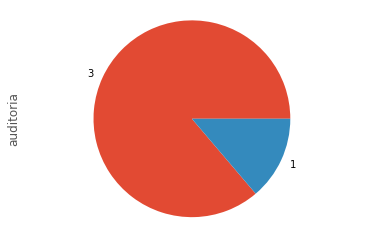

In [9]:
# Verificação da distribuição do aatributo alvo
# 1: queimada; 3 - não queimada
full['auditoria'].value_counts().plot(kind='pie')
plt.axis('equal');

In [10]:
# O conjunto inicial é extenso e será dividido em dados de treino e dados de validação
# de acordo com um conjunto real. 
# Utiliza um conjunto de dados de aproximadamente 1 ano para treinar e gerar o modelo.
# Utiliza dados da análise mais recente para testar.

# Dados reais de março a outubro de 2017. 
# Definição da data: analises de outubro
data_analise = '2017/10/10 00:00:00.000'

# Definição do conjunto de treino: marco a (antes de 10/10)
full_treino = full[full['data_pas'] < data_analise]

# Definição do conjunto de validação: dados de 10/10
full_teste = full[full['data_pas'] == data_analise]

In [11]:
# checking for missing values
print("Das {0} amostras, o treinamento é formado por {1} dados e o conjunto de testes é formado por {2} dados. ".
      format(full.shape[0],full_treino.shape[0],full_teste.shape[0]))

# apaga o dataframe original para liberar espaço
# del full

Das 45893 amostras, o treinamento é formado por 40726 dados e o conjunto de testes é formado por 5167 dados. 


In [12]:
# Verificação geral do conjunto de treinamento
print full_treino.head()

   adjacencias     area_ha  auditoria       bai                 data_pas  \
0            0  101.678710          3  0.152080  2017/09/24 00:00:00.000   
1            0  144.413795          1  0.329100  2017/09/24 00:00:00.000   
2            2  214.029893          3  0.117071  2017/07/22 00:00:00.000   
3            0  542.847434          1  2.344610  2017/07/22 00:00:00.000   
4            0  136.201953          3  0.116398  2017/09/24 00:00:00.000   

   dif_dnbrl  dif_ndvi  focos  medianb2  medianb3  medianb4  medianb5  \
0   0.159632  0.144009      0  0.135514  0.129001  0.145994  0.223395   
1   0.358945  0.207591      9  0.118622  0.096372  0.096033  0.157605   
2   0.440223  0.370918      0  0.116056  0.113866  0.135228  0.270077   
3   0.377577  0.377939      0  0.089205  0.060692  0.049402  0.058082   
4   0.295616  0.164437      0  0.124558  0.123269  0.145655  0.265826   

   medianb6  medianb7     mirbi      nbrl      ndvi      ndwi  
0  0.327896  0.251095  1.297564 -0.05960

In [13]:
# Verificação geral do conjunto de teste
print full_teste.head()

      adjacencias      area_ha  auditoria       bai                 data_pas  \
2646            1    73.209148          1  0.206500  2017/10/10 00:00:00.000   
2647            7  3180.005852          1  0.539167  2017/10/10 00:00:00.000   
2648            0   180.772824          3  0.060625  2017/10/10 00:00:00.000   
2649            0   334.770913          1  0.364608  2017/10/10 00:00:00.000   
2650            1   214.269374          3  0.094703  2017/10/10 00:00:00.000   

      dif_dnbrl  dif_ndvi  focos  medianb2  medianb3  medianb4  medianb5  \
2646   0.248706  0.148521     20  0.117727  0.102327  0.109123  0.202471   
2647   0.343811  0.189784    114  0.118742  0.091958  0.087523  0.117970   
2648   0.387075  0.351231      0  0.218201  0.214296  0.221180  0.352917   
2649   0.339192  0.178105     16  0.116712  0.095201  0.096679  0.147115   
2650   0.350257  0.304322      0  0.180143  0.161103  0.161235  0.293612   

      medianb6  medianb7     mirbi      nbrl      ndvi      nd

In [14]:
full.columns

Index([u'adjacencias', u'area_ha', u'auditoria', u'bai', u'data_pas',
       u'dif_dnbrl', u'dif_ndvi', u'focos', u'medianb2', u'medianb3',
       u'medianb4', u'medianb5', u'medianb6', u'medianb7', u'mirbi', u'nbrl',
       u'ndvi', u'ndwi'],
      dtype='object')

In [15]:
# Para utilizar os modelos, são utilizadas séries do numpy. 
# Dados no formato dataframe são mantidos para utilização em alguns gráficos.

# Identifica as colunas
features = full_treino.columns.difference([ u'data_pas', u'auditoria'])

# Separar o conjunto de dados, em formato numpy, que será usado para treinar o modelo
# representa o conjunto sem a data (desnecessária agora e sem a variável alvo)
X_treino = full_treino[features].values
# representa o conjunto da variável alvo
y_treino = full_treino.auditoria.values

# Separar o conjunto de dados que será usado para validar o modelo
X_teste = full_teste[features].values
y_teste = full_teste.auditoria.values


In [16]:
print full_treino.shape
print full_teste.shape

print X_treino.shape
print X_teste.shape

(40726, 18)
(5167, 18)
(40726, 16)
(5167, 16)


# Início da Análise

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

<h2> Você pode simplesmente chamar seu modelo e ele usará as próprias definições. </h2>

In [18]:
# Instanciando o modelo com as definições internas
dtc = DecisionTreeClassifier()

<h2> Treinando o modelo </h2>

             precision    recall  f1-score   support

          1       1.00      1.00      1.00      4716
          3       1.00      1.00      1.00     36010

avg / total       1.00      1.00      1.00     40726



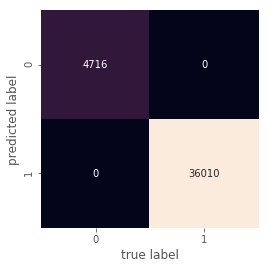

In [19]:
# Utização do modelo no conjunto de treino
dtc.fit(X_treino,y_treino)

# Teste com predição do modelo completo usando os proprios dados de treino
prd = dtc.predict(X_treino)

# Cria uma matriz de confusão com os dados de predições e os dados reais
mat = confusion_matrix(y_treino, prd)

# Mostra a matriz na tela
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Possui métodos com estatísticas para avaliar dois conjuntos 
print(classification_report(prd, y_treino))


<h1>Que maravilha! O modelo é perfeito!</h1>

Porém, testamos o modelo com os mesmos dados usados para treinar esse modelo

Vamos fazer um teste de validação cruzada para termos uma opinião mais idônea...

In [20]:
# Testa a valiadação cruzada do modelo com o conjunto de treinamento
scores_out_dtc = cross_val_score(dtc, X_treino, y_treino, scoring='accuracy', cv=10)

print("\nCross-validation accuracy mean: %0.2f (+/- %0.2f)" % (scores_out_dtc.mean(), scores_out_dtc.std()))
print("Cross-validation accuracies: " , scores_out_dtc)


Cross-validation accuracy mean: 0.95 (+/- 0.04)
('Cross-validation accuracies: ', array([0.95752517, 0.94672232, 0.95998036, 0.97495703, 0.96857353,
       0.97495703, 0.96782908, 0.96488212, 0.91625737, 0.83644401]))


In [21]:
# Nosso modelo não é tão perfeito assim. Alguns conjuntos apresentam mais erros que outros.

# Devemos prestar atenção em qual indicador é relevante. falso positivo? falso negativo?
# É necessário procurar o indicador mais adequado ao problema
# É necessário verificar o conjunto de testes, diferente do conjunto que criou o modelo. 

<h2> Conjunto de Teste </h2>


Accuracy: 0.87 
             precision    recall  f1-score   support

          1       0.67      0.87      0.76      1253
          3       0.95      0.87      0.91      3914

avg / total       0.89      0.87      0.87      5167



Text(91.68,0.5,'predicted label')

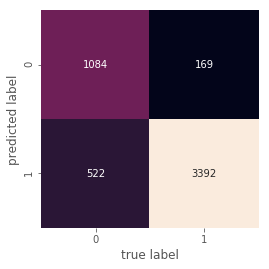

In [22]:
# Teste com predição do modelo completo usando dados de teste diferentes de dados de treinamento
predictions = dtc.predict(X_teste)  

print("\nAccuracy: %0.2f " % dtc.score(X_teste, y_teste))

print (classification_report(predictions, y_teste))

#print("\nCross-validation accuracy mean: %0.2f (+/- %0.2f)" % scores_out_dtc.mean(), scores_out_dtc.std())
mat = confusion_matrix(y_teste, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<h1>Será que podemos melhorar esse modelo?</h1>

In [23]:
# Testar diferentes alternativas para encontrar os melhores parâmetros
# executar 1 vez só porque é um teste caro.

# analisar e definir os parâmetros mais relevantes para cada algoritmo

param_grid = { 'max_depth': [2, 5, 7, 9, 11, 13, 15],
                "criterion": ['entropy', 'gini'],
                "max_features": ['auto', 0.1, 0.2, 0.3]             
             }

# Instancia as combinações dos parâmetros definidos para determinado modelo com um valor determinado de amostras.
grid_dtc = GridSearchCV(dtc, param_grid, cv=10)

# Testa as combinações nos conjuntos 
grid_dtc.fit(X_treino,y_treino)

# Mostra o resultado do melhor modelo encontrado 
print(grid_dtc.best_score_)

# Mostra os parâmetros dos melhor modelo encontrado
print(grid_dtc.best_params_)

0.954918234051957
{'max_features': 'auto', 'criterion': 'gini', 'max_depth': 7}


In [24]:
# Guardo o melhor modelo
best_dtc = grid_dtc.best_estimator_
print best_dtc


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


<h2> Treinando o melhor modelo </h2>

             precision    recall  f1-score   support

          1       0.89      0.83      0.86      5035
          3       0.98      0.99      0.98     35691

avg / total       0.97      0.97      0.97     40726



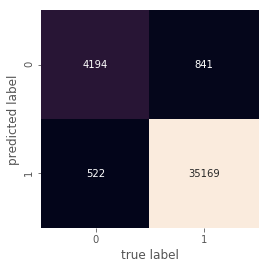

In [25]:
# Utização do modelo no conjunto de treino
best_dtc.fit(X_treino,y_treino)

# Teste com predição do modelo completo usando os proprios dados de treino
prd = best_dtc.predict(X_treino)

# Cria uma matriz de confusão com os dados de predições e os dados reais
mat = confusion_matrix(y_treino, prd)

# Mostra a matriz na tela
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Possui métodos com estatísticas para avaliar dois conjuntos 
print(classification_report(prd, y_treino))

In [26]:
# Testa a valiadação cruzada do modelo com o conjunto de treinamento
scores_out_dtc = cross_val_score(best_dtc, X_treino, y_treino, scoring='accuracy', cv=10)

print("\nCross-validation accuracy mean: %0.2f (+/- %0.2f)" % (scores_out_dtc.mean(), scores_out_dtc.std()))
print("Cross-validation accuracies: " , scores_out_dtc)


Cross-validation accuracy mean: 0.95 (+/- 0.04)
('Cross-validation accuracies: ', array([0.97520255, 0.95065063, 0.95457893, 0.97986742, 0.97176528,
       0.974466  , 0.96954813, 0.97372299, 0.94032417, 0.84872299]))


In [27]:
# O resultado não parece melhor no conjunto conhecido.
# Mas, e se usarmos o conjunto de teste, como o novo modelo se comporta?

<h2> Conjunto de Teste </h2>


Accuracy: 0.90 
             precision    recall  f1-score   support

          1       0.75      0.90      0.82      1331
          3       0.96      0.89      0.93      3836

avg / total       0.91      0.90      0.90      5167



Text(91.68,0.5,'predicted label')

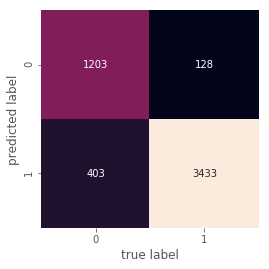

In [28]:
# Teste com predição do modelo completo usando os proprios dados de teste
predictions = best_dtc.predict(X_teste)  

print("\nAccuracy: %0.2f " % best_dtc.score(X_teste, y_teste))

print (classification_report(predictions, y_teste))

#print("\nCross-validation accuracy mean: %0.2f (+/- %0.2f)" % scores_out_dtc.mean(), scores_out_dtc.std())
mat = confusion_matrix(y_teste, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<h2> Realmente, a análise permitiu encontrar um modelo com melhores resultados. </h2>

In [29]:
print full_teste[features].columns

Index([u'adjacencias', u'area_ha', u'bai', u'dif_dnbrl', u'dif_ndvi', u'focos',
       u'medianb2', u'medianb3', u'medianb4', u'medianb5', u'medianb6',
       u'medianb7', u'mirbi', u'nbrl', u'ndvi', u'ndwi'],
      dtype='object')


In [30]:
# Visão geral da importância de cada atributo em um modelo de árvores de decisão 

## list of features to be used
features = [c for c in full.columns if c not in [ 'data_pas', 'auditoria','id']]

# Separar o conjunto de dados que será usado para treinar o modelo, sem o resultado
X_full = full[features].values
y_full = full.auditoria.values

features_importance = zip(best_dtc.feature_importances_,features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %0.2f%%" % (feature, importance*100))

focos: 23.33%
bai: 22.13%
nbrl: 17.56%
medianb6: 14.01%
mirbi: 6.38%
ndwi: 5.15%
medianb5: 3.86%
ndvi: 2.25%
medianb3: 2.01%
dif_ndvi: 1.35%
dif_dnbrl: 0.57%
adjacencias: 0.36%
medianb2: 0.33%
medianb7: 0.29%
medianb4: 0.29%
area_ha: 0.15%


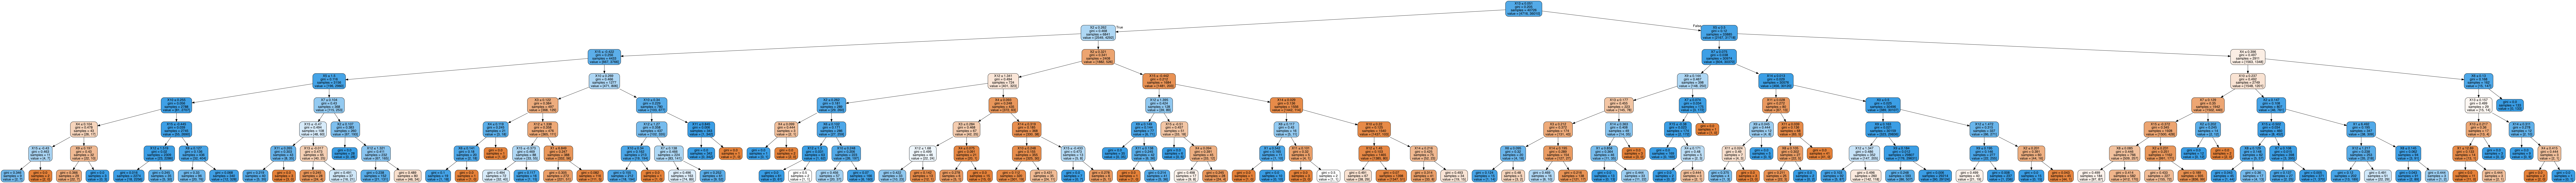

In [31]:
# Visualização da árvore de decisão
# É necessário instalar antes, nessa ordem....
# Instalar graphviz
# Instalar pydotplus 

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(best_dtc, out_file=dot_data,  filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("tree.pdf")
Image(graph.create_png())